In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

20144753 Seon, Seung-yeop

https://github.com/SYseon/assignment07


-  To find the y-intercept and slope of the graph with the smallest distance from the point, solve the following equation.
\begin{equation}A=\begin{Bmatrix} 
      1 & x_{1} & \dots & x_{1}^p\\
    1 & x_{2} & \dots & x_{2}^p\\
    \vdots & \vdots & \vdots & \vdots \\
    1 & x_{n} & \dots & x_{n}^p\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}b=\begin{Bmatrix} 
      y_1\\
    y_2\\
    \vdots\\
    y_n\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}x=(A^TA)^{-1}A^Tb\end{equation}

- The function get_approximate returns the y value of the function after obtaining the minimized function.
- Error function will return the distance from the respective matrix.

In [60]:
 
def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f


def get_approximate(X,y,p, optimal=False):
    arr = np.ones((X.shape[0], p))
    for i in range(p):
        arr.T[i]=X**i
    parameter = np.dot(np.dot(lin.inv(np.dot(arr.T,arr)), arr.T), y)
    if optimal==True:
        print("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n optimized parameter:", parameter)
    return np.dot(arr, parameter)

def error(y1,y2):
    temp = y2-y1
    temp = (np.abs(temp))**2
    return temp

In [61]:
num     = 1001
std     = 5
n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)+ nn * std

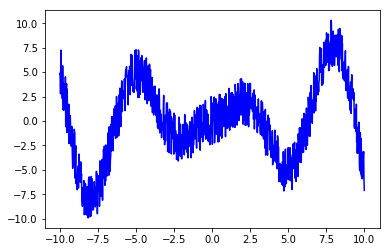

In [62]:
plt.plot(x, y1, 'b')
plt.show()

- Points mixed with noise.

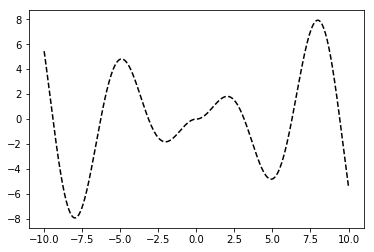

In [63]:
y2 = fun(x)
plt.plot(x, y2, 'k--')
plt.show()

- A curve without noise.

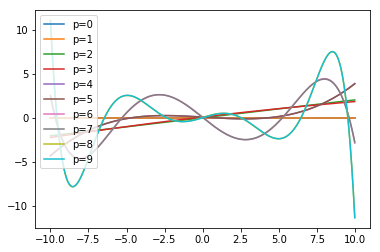

In [64]:
for i in range(10):
    y3 = get_approximate(x, y1, i)
    string = "p="+ str(i)
    plt.plot(x, y3, label = string)
plt.legend(loc='upper left')
plt.show()

- Curves optimized by least square.

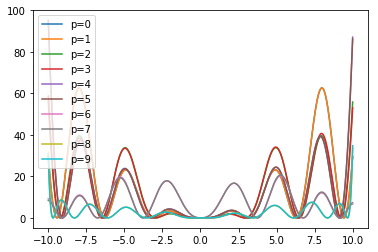

In [65]:
for i in range(10):
    y3 = get_approximate(x, y1, i)
    string = "p="+ str(i)
    plt.plot(x, error(y3, y2), label = string)
plt.legend(loc='upper left')
plt.show()

- Errors between points without noise and points optimized by least square.

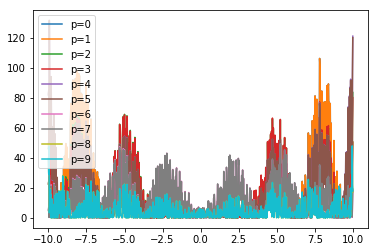

In [66]:
for i in range(10):
    y3 = get_approximate(x, y1, i)
    string = "p="+ str(i)
    plt.plot(x, error(y3,y1), label = string)
plt.legend(loc='upper left')
plt.show()

- Errors between points with noise and points optimized by least square.

















 optimized parameter: [-1.11020734e-01  7.64839506e-01  1.54201116e-01  2.12540081e-01
 -2.85026361e-02 -5.47341759e-02  2.31143673e-03  3.66395733e-03
 -1.01044153e-04 -1.21817848e-04  2.59577091e-06  2.40598509e-06
 -4.03685190e-08 -2.97781146e-08  3.73251181e-10  2.27389118e-10
 -1.88459541e-12 -9.80419950e-13  3.99394266e-15  1.82616921e-15]


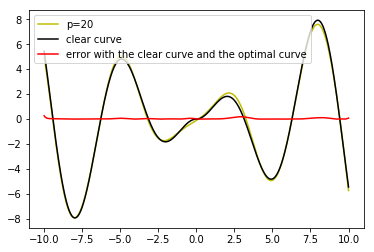

In [69]:
temp = error(y3, y2)
save_i = 0
for i in range(100):
    y3 = get_approximate(x, y1, i)
    if temp.sum() > error(y3,y2).sum():
        temp = error(y3, y2)
        save_i = i
y3 = get_approximate(x, y1, save_i, optimal = True)
string = "p=" + str(save_i)
plt.plot(x, y3, 'y', label = string)
plt.plot(x, y2, 'k', label = 'clear curve')
plt.plot(x, error(y2,y3), 'r', label = 'error with the clear curve and the optimal curve')
plt.legend(loc='upper left')
plt.show()

- The optimized curve is come from noise value. If p is grown, it is obvious that graph will be on all of the noise values. So we have find appropriate value of p satisfying error between the curve without noise and the curve optimized by least square is minimized. For this reason, I just compared values when p is less than 100.